In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Additional data for coefi and result
additional_coefi = np.array([
    [3, -9, 12], [2, -8, 15], [1, -6, 8], [4, -10, 20], [5, -12, 25],
    [2, -4, 4], [3, -7, 10], [1, -3, 3], [2, -5, 6], [4, -8, 16]
], dtype=float)

additional_result = np.array([
    [5, 3], [4, 2], [3, 1], [6, 4], [7, 5],
    [2, 1], [4, 2], [1, 0.5], [3, 1.5], [5, 3]
], dtype=float)
coefi = np.array([[1, -5, 6], [1, -14, 49],[2, -7, 3], [-1, 7, -10], [1, -7, -18], [6, -5, 1], [4, -6, 2]], dtype=float)
result = np.array([[3, 2], [7,7], [3, .5], [2,5], [9,-2], [.5, .33], [1, .5]], dtype=float)

# Concatenate the additional data to the existing data
coefi = np.concatenate((coefi, additional_coefi), axis=0)
result = np.concatenate((result, additional_result), axis=0)



In [3]:
shadow1 = tf.keras.layers.Dense(units=5, input_shape=[3], activation='relu')
shadow2 = tf.keras.layers.Dense(units=5, activation='relu')
shadow3 = tf.keras.layers.Dense(units=5, activation='relu')
shadow4 = tf.keras.layers.Dense(units=5, activation='relu')
exit = tf.keras.layers.Dense(units=2, activation='linear')
modelo = tf.keras.Sequential([shadow1, shadow2, shadow3, shadow4, exit])

c:\Users\erick\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.5),
    loss = 'mean_squared_error'
)

In [5]:
print("Comenzando entrenamiento...")
historial = modelo.fit(coefi, result, epochs=2000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


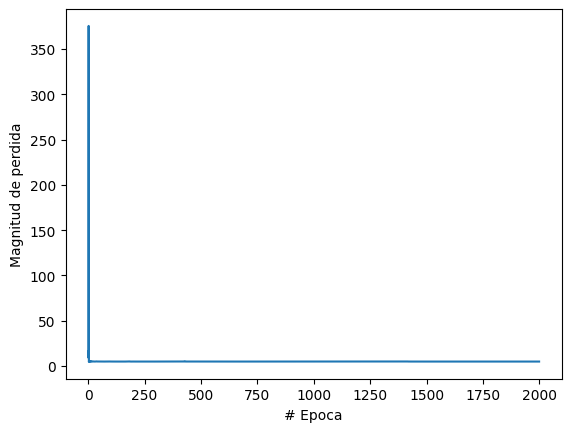

In [6]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])
plt.show()

In [7]:
print("Predicciones")
print(shadow1.get_weights())
print(shadow2.get_weights())
print(exit.get_weights())

Predicciones
[array([[-3.165485 , -1.974164 ,  2.746363 , -3.799212 , -3.8495307],
       [ 3.5550048,  2.0134318, -3.037995 ,  4.0002627,  3.8999624],
       [-2.502202 ,  1.4213216,  3.4039452, -4.6207576,  1.6849627]],
      dtype=float32), array([ 3.5175862, -1.6838416,  1.8231492,  1.2341843, -3.651614 ],
      dtype=float32)]
[array([[-3.7075028 , -3.001144  , -0.25068444, -2.5786052 , -3.5292714 ],
       [-2.9472222 , -1.8995135 , -2.3804688 , -3.7383814 , -2.1775289 ],
       [-2.4966903 , -3.3582282 , -3.130036  , -1.5970944 , -0.761968  ],
       [-2.5030358 , -2.7680044 , -0.44293156, -3.0712414 , -0.7466407 ],
       [-2.4436724 , -2.3412416 , -3.1103058 , -2.2851567 , -3.255531  ]],
      dtype=float32), array([-3.0027106, -2.3024483, -3.061044 , -2.931628 , -3.0733616],
      dtype=float32)]
[array([[ 2.4414117 ,  2.7586083 ],
       [ 1.4573817 ,  0.27206388],
       [ 0.6666342 , -0.75852394],
       [ 2.6990423 ,  3.1790493 ],
       [-0.87160623, -2.1049438 ]], dtype

In [8]:
print("Hagamos una predicción")
resultado = modelo.predict(np.array([[1, 3, 2]], dtype=float))
print("Resultado de la predicción:", resultado)

Hagamos una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Resultado de la predicción: [[3.8529425 2.1370592]]
